# Ejercicio 4

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100

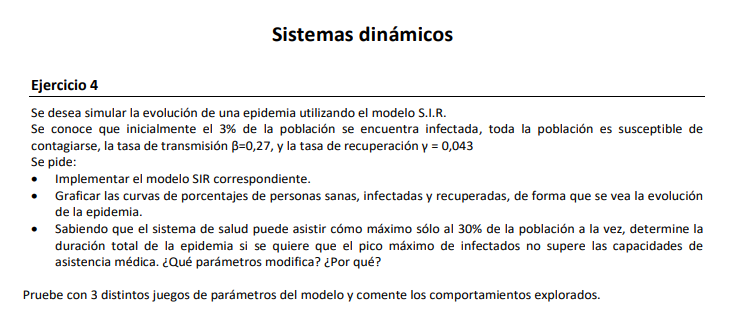

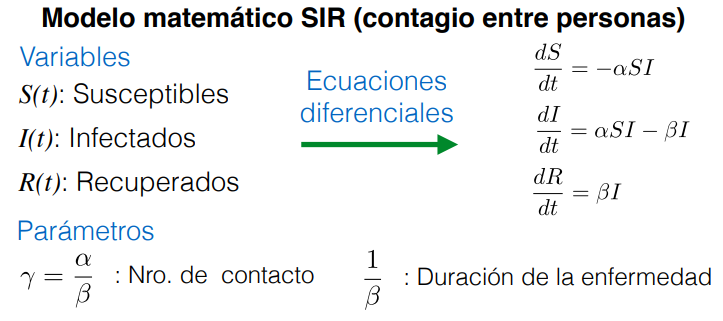

In [3]:
def simulate(infection_rate, recovery_rate, y_init, n_points):
    def sir_model(y,t):
        s, i, r = y 
        d0 = -A*s*i #derivada de S(t)
        d1 = A*s*i - B*i #derivada de I(t)
        d2 = B*i #derivada de R(t)
        return [d0, d1, d2]
    
    A = infection_rate # infection rate
    B = recovery_rate # recovery rate
    t = np.linspace(start=1,stop=n_points,num=n_points)
    y = odeint(sir_model,y_init,t)
    return {"S": y[:,0], "I": y[:,1], "R": y[:,2], "t": t}

def plot_sir(S, I, R, t, C):
    plt.plot(t, S, 'r', label='Suceptibles')
    plt.plot(t, I, 'b', label='Infectados')
    plt.plot(t, R, 'g',label='Recuperados')
    if C:
        plt.plot(t, C, 'black',label='Capacidad maxima')
    plt.legend()
    plt.figure(figsize=(40, 60))
    plt.show()

    S_0 --> Suceptibles iniciales
    I_0 --> Infectados iniciales
    R_0 --> Recuperados iniciales
    y_init = [S_0, I_0, R_0]

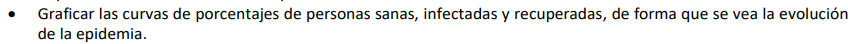

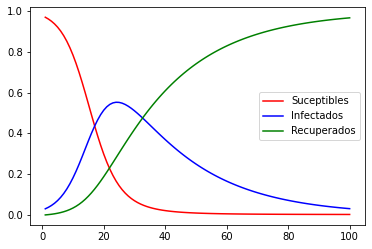

<Figure size 2880x4320 with 0 Axes>

In [81]:
params = {"infection_rate": 0.27,
          "recovery_rate": 0.043,
          "y_init": [0.97, 0.03, 0],
          "n_points": N}

sir_data = simulate(**params)
plot_sir(**sir_data, C=None)

## Segunda corrida

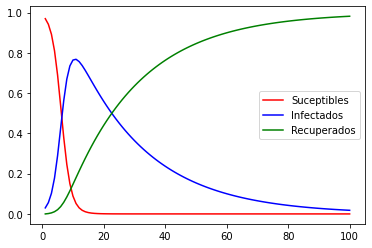

<Figure size 2880x4320 with 0 Axes>

In [82]:
params_2 = {"infection_rate": 0.70,
          "recovery_rate": 0.043,
          "y_init": [0.97, 0.03, 0],
          "n_points": N}

sir_data_2 = simulate(**params_2)
plot_sir(**sir_data_2, C=None)

## Tercera corrida

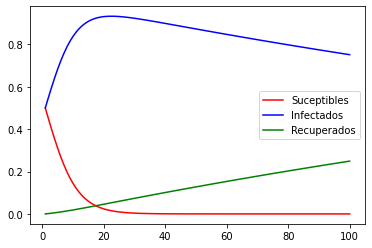

<Figure size 2880x4320 with 0 Axes>

In [83]:
params_3 = {"infection_rate": 0.20,
          "recovery_rate": 0.003,
          "y_init": [0.5, 0.5, 0],
          "n_points": N}

sir_data_3 = simulate(**params_3)
plot_sir(**sir_data_3, C=None)

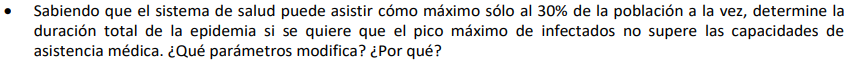

In [33]:
CAPACIDAD_MAXIMA = 0.3

In [70]:
params_c = {"infection_rate": 0.13,
          "recovery_rate": 0.043,
          "y_init": [0.99, 0.01, 0],
          "n_points": 2*N}

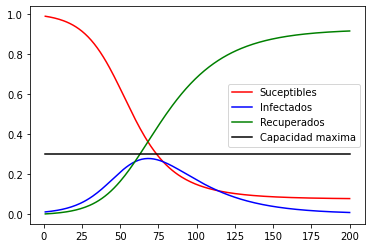

<Figure size 2880x4320 with 0 Axes>

In [77]:
sir_data_c = simulate(**params_c)
cap = [CAPACIDAD_MAXIMA for t in sir_data_c["t"]]
plot_sir(**sir_data_c, C=cap)

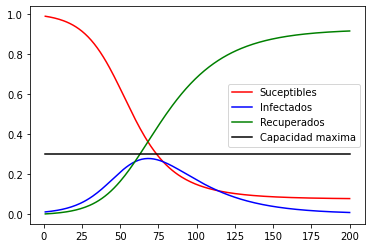

<Figure size 2880x4320 with 0 Axes>

In [78]:
params_c2 = {**params_c, **{"infection_rate": 0.12}}
sir_data_c2 = simulate(**params_c2)
plot_sir(**sir_data_c2, C=cap)

## Conclusiones

Podemos suponer una deteccion temprana de la enfermedad por lo que arrancamos con 1% de la poblacion infectada solamente. Ademas endurenciendo las restricciones de circulacion podemos bajar la tasa de infeccion (infection_rate) al 13% o 12% para lograr que el sistema sanitario no se sature (solo el 30% de la poblacion esta infectada al mismo tiempo). Para poder lograr estas condiciones necesitamos el doble de tiempo que las corridas anteriores (2N).

